In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ios_data = pd.read_csv('Resources/applestore.csv')
android_data = pd.read_csv('Resources/googleplaystore.csv')
ios_data.head(5)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [3]:
#df = pd.merge(ios_data, android_data, how="right", on=["track_name", "App"],suffixes=("_ios", "_android"))

In [4]:
ios_data["prime_genre"].value_counts()

Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64

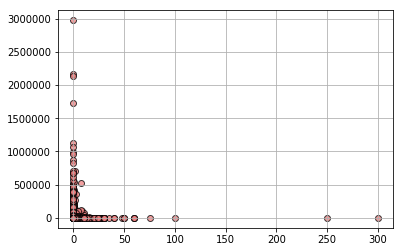

In [18]:
plt.scatter(ios_data["price"], ios_data["rating_count_tot"], marker="o", facecolors="lightcoral", edgecolors="black", alpha=0.75)
#plt.title("City Latitude vs. Cloudiness ("+time.strftime("%d/%m/%Y")+")")
#plt.xlabel("Latitude")
#plt.ylabel("Cloudiness (%)")
#plt.savefig("output_data/CityLatitudeVsCloudiness.png")
plt.grid(True)
plt.show()

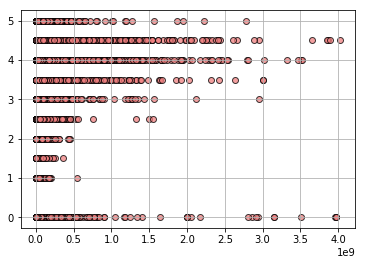

In [9]:
plt.scatter(ios_data["size_bytes"], ios_data["user_rating"], marker="o", facecolors="lightcoral", edgecolors="black", alpha=0.75)
#plt.title("City Latitude vs. Cloudiness ("+time.strftime("%d/%m/%Y")+")")
#plt.xlabel("Latitude")
#plt.ylabel("Cloudiness (%)")
#plt.savefig("output_data/CityLatitudeVsCloudiness.png")
plt.grid(True)
plt.show()

In [10]:
def paid(x):
    if x>0:
        return 'Paid'
    else :
        return'Free'

ios_data['paidorfree']= ios_data.price.apply(lambda x : paid(x))

In [11]:
s = ios_data.prime_genre.value_counts().index[:4]
def categ(x):
    if x in s:
        return x
    else : 
        return "Others"

ios_data['broad_genre']= ios_data.prime_genre.apply(lambda x : categ(x))
ios_data

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,broad_genre,paidorfree
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,Games,Paid
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Others,Free
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Others,Free
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,Others,Free
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,Others,Free
5,6,283619399,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,1,Games,Paid
6,7,283646709,PayPal - Send and request money safely,227795968,USD,0.00,119487,879,4.0,4.5,6.12.0,4+,Finance,37,0,19,1,Others,Free
7,8,284035177,Pandora - Music & Radio,130242560,USD,0.00,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1,Others,Free
8,9,284666222,PCalc - The Best Calculator,49250304,USD,9.99,1117,4,4.5,5.0,3.6.6,4+,Utilities,37,5,1,1,Others,Paid
9,10,284736660,Ms. PAC-MAN,70023168,USD,3.99,7885,40,4.0,4.0,4.0.4,4+,Games,38,0,10,1,Games,Paid


/anaconda3/envs/pythondata/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


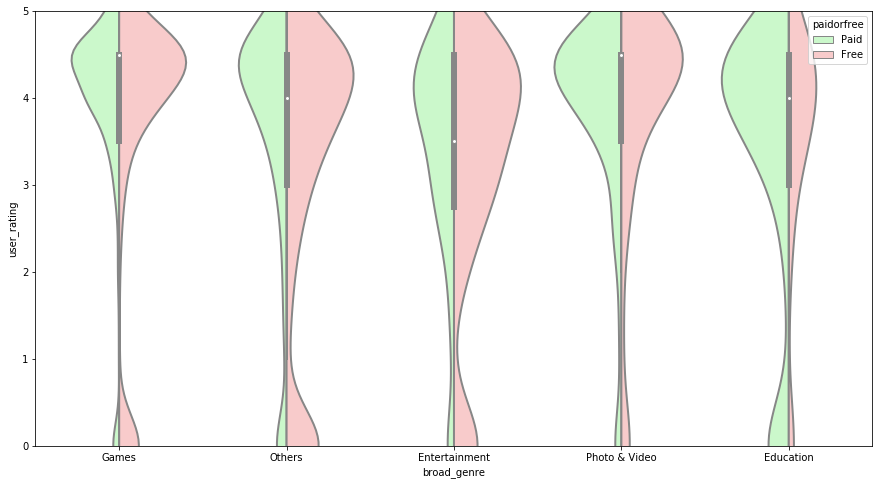

In [17]:
plt.figure(figsize=(15,8))
plt.style.use('fast')
plt.ylim([0,5])
sns.violinplot(data=ios_data, y ='user_rating',x='broad_genre',hue='paidorfree',
               vertical=True,kde=False,split=True ,linewidth=2,
               scale ='count', palette=['#c4ffc4','#ffc4c4'])